In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.basics import *

# Implementing GD (not SGD) on a Linear Regression problem
## SGD only means implementing GD in mini-baches
We will create some artificial data of the form y = ax + b representing a line  
Since we will take many values of x, we will take data in form of a matrix with 2 columns  
  
First column representing different values of x  
Second column containing only 1 since our equation can be represented as y = ax + b(1)
  
So, we'll be creating 2 matrices one with [different values of x, 1] and other with coefficients [a,b]  

In [11]:
#we're taking 100 values of x
n = 100
x = torch.ones(n,2)
x[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [13]:
#now first column conatins random values of uniformly distributed from -1 to 1
#the underscore at end of uniform makes the changes inplace, basically it is doing x = x + any_change 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.6063,  1.0000],
        [-0.4335,  1.0000],
        [ 0.1412,  1.0000],
        [ 0.3124,  1.0000],
        [ 0.6577,  1.0000]])

In [15]:
#now we choose values of coefficients
a = tensor(3.,2)
a

tensor([3., 2.])

In [16]:
# @ is for matrix multiplication
y = x@a
y[:5]

tensor([3.8190, 0.6996, 2.4235, 2.9372, 3.9730])

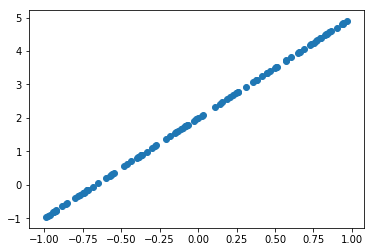

In [17]:
#plotting values of y for different values of x
plt.scatter(x[:,0],y)

In [18]:
#In real life we most likely will not obtain such a straight line, so let's add some noise to data
#we just add some random numbers to our output y during multiplication of each row
y = x@a + torch.rand(n)
y[:5]

tensor([4.6981, 1.1694, 2.9360, 2.9531, 4.9071])

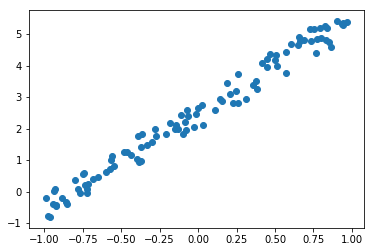

In [19]:
#plotting values of y for different values of x after adding some noise
plt.scatter(x[:,0],y)

Now, consider that we were given values of x and corresponding output values y initially and we have to obtain the values of coefficients a & b i.e. tensor 'a'.

We want to find parameters (weights) 'a' such that you minimize the error between the points and the line x@a. Note that here 'a' is unknown. For a regression problem the most common error function or loss function is the mean squared error.

In [20]:
def mse(y_hat,y):
    return ((y_hat-y)**2).mean()

In [21]:
#Initially we take any random value for our coefficients sav -1 and 1
a = tensor(-1.,1)
a

tensor([-1.,  1.])

In [22]:
y_hat = x@a
loss = mse(y_hat,y)
loss

tensor(8.1129)

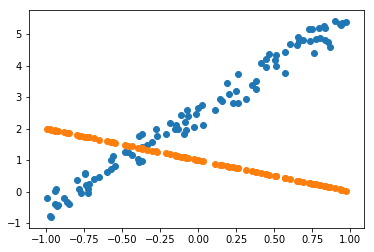

In [23]:
#blue points -> actual data
#orange points -> predicted data
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [24]:
#we deine a as parameter for .grad() to work
a = nn.Parameter((-1.,1))
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [25]:
def update():
    #calculate y_hat and loss each time with updated value of a
    y_hat = x@a
    loss = mse(y_hat,y)
    
    #to print loss from time-to-time 
    if t%10==0:
        print(loss)
        
    #Calculate the gradient. In PyTorch, calculating the gradient is done by using a method called backward.
    #Mean squared error was just a simple standard mathematical function. PyTorch keeps track of how it was 
    #calculated and lets us calculate the derivative. So if you do a mathematical operation on a tensor in 
    #PyTorch, you can call backward to calculate the derivative and the derivative gets stuck inside an 
    #attribute called .grad.
    loss.backward()
    
    #Take my coefficients and I'm going to subtract from them my gradient (sub_). There is an underscore 
    #there because that's going to do it in-place. It's going to actually update those coefficients a to 
    #subtract the gradients from them. Why do we subtract? Because the gradient tells us if I move the whole 
    #thing downwards, the loss goes up. If I move the whole thing upwards, the loss goes down. So I want to 
    #do the opposite of the thing that makes it go up. We want our loss to be small. That's why we subtract.
    with torch.no_grad():
        a.sub_(lr * a.grad)  #basically it is doing a = a - (lr * a.grad)
        
        '''
        -----> IMPORTANT NOTE <-----
        we are concerned only with the sign of gradient value which gives us the direction of jump
        
        we always move in opposite direction of gradient sign
        
        the length of jump is determined by lr that we multipy with the gradient, for eg. if grad magnitude is
        2 and lr is 1e-3 then would have jumped (±)0.002 from current value of our coeffecient Or if grad 
        magnitude is 7 and lr is 1e-3 then would have jumped (±)0.007 from current value of our coeffecient.
        In both the cases we ultimately jumped at a rate of 1e-3
        
        so above expression is actually a = a + (lr * (-a.grad))
        '''
        a.grad.zero_()

In [26]:
lr = 1e-1
for t in range(0,100):
    update()

tensor(8.1129, grad_fn=<MeanBackward1>)
tensor(1.4542, grad_fn=<MeanBackward1>)
tensor(0.3739, grad_fn=<MeanBackward1>)
tensor(0.1387, grad_fn=<MeanBackward1>)
tensor(0.0866, grad_fn=<MeanBackward1>)
tensor(0.0750, grad_fn=<MeanBackward1>)
tensor(0.0724, grad_fn=<MeanBackward1>)
tensor(0.0719, grad_fn=<MeanBackward1>)
tensor(0.0717, grad_fn=<MeanBackward1>)
tensor(0.0717, grad_fn=<MeanBackward1>)


In [28]:
#predicted a, remember we originally took 'a' as [3,2] before adding noise
a

Parameter containing:
tensor([3.0633, 2.5135], requires_grad=True)

In [30]:
#we continue with more iterations
for t in range(0,30):
    update()

tensor(0.0717, grad_fn=<MeanBackward1>)
tensor(0.0717, grad_fn=<MeanBackward1>)
tensor(0.0717, grad_fn=<MeanBackward1>)


In [31]:
a

Parameter containing:
tensor([3.0655, 2.5136], requires_grad=True)

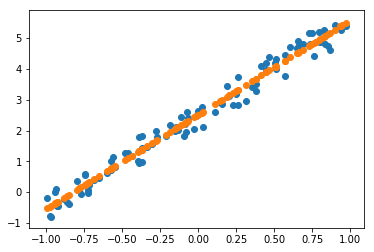

In [33]:
y_hat = x@a #y_hat with predicted value of a
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

# Animating the changes in y_hat with each iteration of update()

In [34]:
from matplotlib import animation, rc
rc('animation', html='html5')

You may need to uncomment the following to install the necessary plugin the first time you run this: (after you run following commands, make sure to restart the kernal for this notebook)

In [35]:
# ! sudo add-apt-repository -y ppa:mc3man/trusty-media  
# ! sudo apt-get update -y 
# ! sudo apt-get install -y ffmpeg  
# ! sudo apt-get install -y frei0r-plugins

gpg: keybox '/tmp/tmpt5vzxwin/pubring.gpg' created
gpg: failed to start the dirmngr '/usr/bin/dirmngr': No such file or directory
gpg: connecting dirmngr at '/tmp/tmpt5vzxwin/S.dirmngr' failed: No such file or directory
gpg: keyserver receive failed: No dirmngr
Ign:1 http://deb.debian.org/debian stretch InRelease
Get:2 http://deb.debian.org/debian stretch-updates InRelease [91.0 kB]
Get:3 http://deb.debian.org/debian stretch-backports InRelease [91.8 kB]       
Hit:4 http://deb.debian.org/debian stretch Release                            
Hit:5 http://security.debian.org stretch/updates InRelease                    
Hit:6 http://packages.cloud.google.com/apt cloud-sdk-stretch InRelease         
Hit:7 http://packages.cloud.google.com/apt google-compute-engine-stretch-stable InRelease
Ign:8 http://ppa.launchpad.net/mc3man/trusty-media/ubuntu eoan InRelease       
Hit:10 http://packages.cloud.google.com/apt google-cloud-packages-archive-keyring-stretch InRelease
Hit:11 https://deb.nodesou

In [36]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)